**Assignment 10:** Build an RNN (LSTM) on Pixel Sequences - MNIST Dataset


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,618 (111.79 KB)

 Trainable params: 28,618 (111.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.6035 - loss: 1.1794 - val_accuracy: 0.9318 - val_loss: 0.2234
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.9357 - loss: 0.2095 - val_accuracy: 0.9495 - val_loss: 0.1570
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9609 - loss: 0.1335 - val_accuracy: 0.9663 - val_loss: 0.1097
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9672 - loss: 0.1079 - val_accuracy: 0.9688 - val_loss: 0.0968
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9741 - loss: 0.0860 - val_accuracy: 0.9745 - val_loss: 0.0803
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9755 - loss: 0.0803 - val_accuracy: 0.9727 - val_loss: 0.0875
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9797 - loss: 0.0656 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9815 - loss: 0.0582 - 

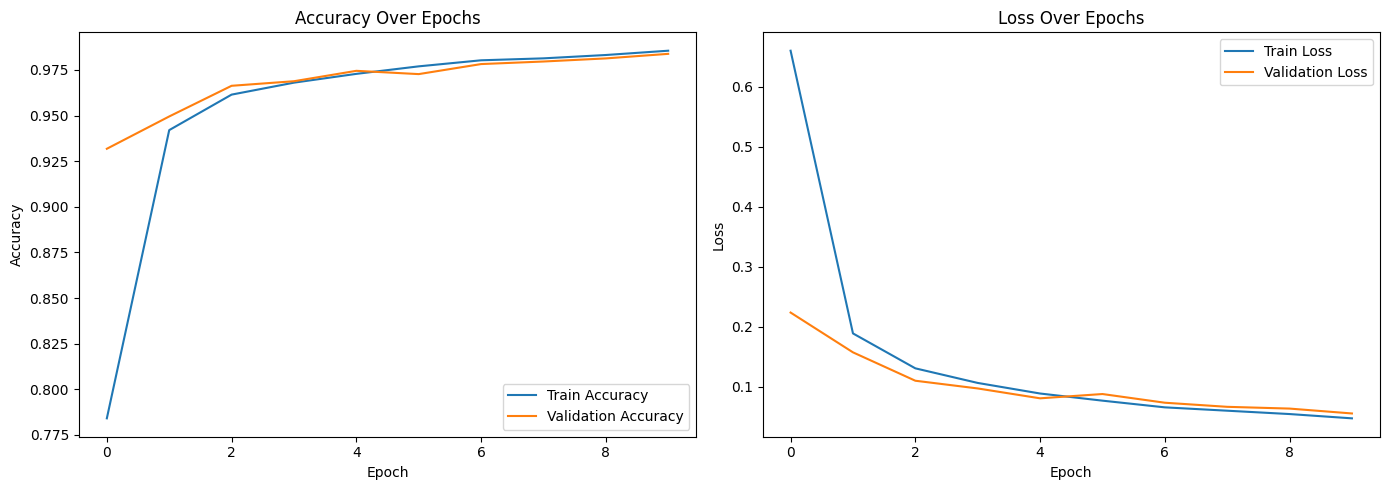

In [ ]:
# Assignment 10: Build an RNN (LSTM) on Pixel Sequences - MNIST Dataset

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255  # Normalize pixel values
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Define LSTM-based RNN Model
model = Sequential([
    LSTM(64, input_shape=(28, 28)),  # Treat each row as a time step
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 3: Train the Model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128,
                    verbose=1)

# Step 4: Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
